# Multiple Linear Regression 

This notebook plays with data from a [kaggle dataset](https://www.kaggle.com/code/ahmedabbas757/student-performance-prediction-eda-ml) representing Student Performance. Out of just the math formulas + theory, I was able to create a custom gradient descent algorithm. I calculcated an effective model to predict student's performance. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


# Functions

In [2]:
def f_wb(x : np.ndarray, w : np.ndarray, b):
    return np.dot(w, x) + b

In [3]:
def J(w : np.ndarray, b : float, x_data, y_data):
    m = x_data.shape[0]
    my_sum = 0
    for i in range(m):
        my_sum += (f_wb(x_data[i], w, b) - y_data[i]) ** 2
    return (1.0 / (2 * m)) * my_sum

In [4]:
def d_db(w : np.ndarray, b : float, x_data, y_data):
    m = x_data.shape[0]
    my_sum = 0
    for i in range(m):
        # result = f_wb(x_data[i], w, b)  # result should be a scalar
        # print(f"f_wb(x_data[{i}], w, b) = {result}")
        # my_sum += result - y_data[i]

        my_sum += f_wb(x_data[i], w, b) - y_data[i]

    return (1.0 / m) * my_sum

In [5]:
def d_dw(w : np.ndarray, b : float, j, x_data, y_data):
    m = x_data.shape[0]
    my_sum = 0
    for i in range(m):
        my_sum += (f_wb(x_data[i], w, b) - y_data[i]) * x_data[i][j]


    return (1.0 / m) * my_sum
    

In [46]:
def gradient_descent(w_vec_input : np.ndarray, b_input : float, a : float, x_data, y_data, num_of_iterations=-1) -> tuple[np.ndarray, float, list]:
    '''if include num_of_iteration, will return cost array for that num of iterations'''
    
    w_vec = w_vec_input.copy()
    b = b_input
    
    
    ACCEPTABLE_CHANGE = 1e-6
    done = False

    new_w : np.ndarray = np.zeros(w_vec.shape)

    js = []

    def should_continue(done, num_of_iterations, iteration):
        if num_of_iterations == -1:
            return not done

        return iteration < num_of_iterations

    
    iteration = 0
    
    while should_continue(done, num_of_iterations, iteration):
        iteration += 1
        changes = []
        done = True
        
        for i in range(len(w_vec)):
            change = d_dw(w_vec, b, i, x_data, y_data)
            new_w[i] = w_vec[i] - a * change

            changes.append(change)
            if abs(change) > ACCEPTABLE_CHANGE:
                done = False
        
        change = d_db(w_vec, b, x_data, y_data)
        changes.append(change)
        b = b - a * change
        if abs(change) > ACCEPTABLE_CHANGE:
            done = False
            
        w_vec[:] = new_w

        if num_of_iterations != -1:
            js.append(J(w_vec, b, x_data, y_data))


    return w_vec, b, js

In [8]:
def normalize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Data

## See Data

In [37]:
file_path = "/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv"
df = pd.read_csv(file_path)
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes": 1, "No": 0}).astype(int)
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


<ipython-input-37-c459c01dac70>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes": 1, "No": 0}).astype(int)


In [67]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB
None
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                   

## Use Data

In [49]:
    NUM_OF_DATA_POINTS = 10000
    y_data = df["Performance Index"].iloc[:NUM_OF_DATA_POINTS].to_numpy()
    x_data = df.drop(columns=["Performance Index"]).iloc[:NUM_OF_DATA_POINTS].to_numpy()
    starting_w = np.ones(x_data.shape[1])
    starting_b = 1

In [50]:
x_data = normalize(x_data)

In [51]:
original_cost = J(starting_w, starting_b, x_data, y_data)
print(f"Original Cost: {original_cost}")

Original Cost: 1630.244592885668


### Calculating Learning Rate

In [67]:
def graph_cost_per_learning_rate(alpha):
    NUM_OF_ITERATIONS = 50
    
    w, b, js = gradient_descent(starting_w, starting_b, alpha, x_data, y_data, NUM_OF_ITERATIONS)

    x_iterations = range(1, NUM_OF_ITERATIONS + 1)

    plt.scatter(x_iterations, js)
    plt.xlabel('Iterations')
    plt.ylabel('Cost J(w,b)')
    plt.title(f'Scatter Plot of Cost with learning rate of {alpha}')
    plt.show()
    

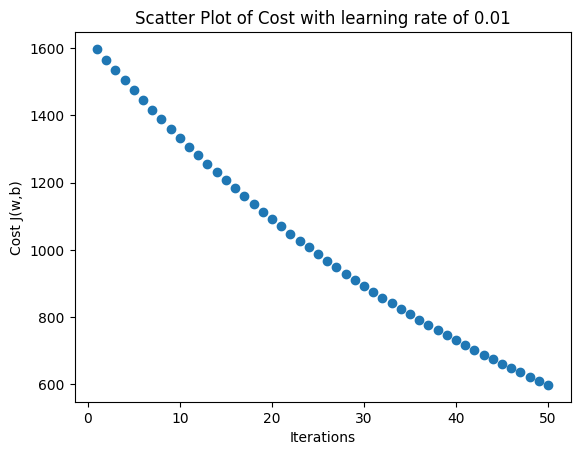

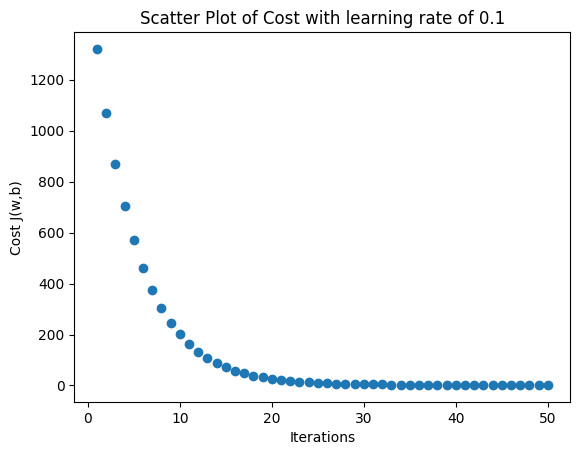

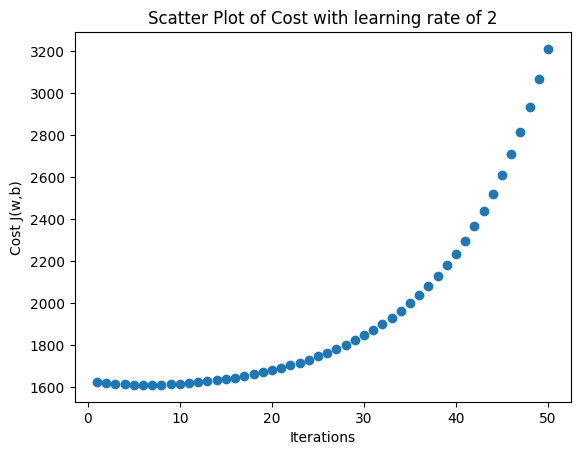

In [68]:
alpha = 0.1
graph_cost_per_learning_rate(0.01)
graph_cost_per_learning_rate(0.1)
graph_cost_per_learning_rate(2)

#### Learning Curve Found
As we can see from the graphs above, the largest effective learning rate is about 0.1

A learning rate of 2 makes our cost function INCREASE - very bad 🙅🏻‍♀️

A learning rate of 0.01 just takes too long - somewhat bad 🙅🏻‍♀️

But after some tinkering a learning rate of 0.1 will give us a nice drop of cost per iteration without taking forever 😍


#### Iterations Needed
We also observe that we only really need about 30 iterations for the cost function to converge

However, we will be using automatic detection of convergence

# THE Gradient Descent

In [72]:
w, b, _ = gradient_descent(starting_w, starting_b, 0.1, x_data, y_data)
print("THE W: ", w)
print("THE B: ", b)

THE W:  [ 7.38688198 17.6619758   0.30643228  0.8149228   0.55567043]
THE B:  55.22479918779236


The weights are as follows:

7.4 * `hours_studied` + 17.6619758 * `previous_scores` + 0.30643228 * `extracurricular_activities` +  0.8149228 * `sleep_hours` +   0.55567043 * `sample_question_papers_answered`

This demonstrates that `previous_scores` has the most significant pull on `perfomance_index`. For futher proof, please see **Demonstrating Previous Scores Strong correlation to Performance Index** section below

# Testing Results

In [107]:
final_cost = J(w, b, x_data, y_data)
print(f"Final cost: {final_cost}")

Final cost: 2.075675316973423


This final cost of 2.08 demonstrates that the algorithm was effective as originally, after normalizing x_data, the cost was 1630.24. The cost was significantly decreased

In [108]:
y_pred = np.array([np.dot(x, w) + b for x in x_data])
errors = np.abs(y_pred - y_data)

In [109]:
print("Max Error:", np.max(errors))
print("Mean Error:", np.mean(errors))
print("Median Error:", np.median(errors))

Max Error: 8.7932165513182
Mean Error: 1.617482271330149
Median Error: 1.3607143160343327


The model's prediction will be off by about 2. This is really good as the Performance Index data was in between 10 -> 100 (a range of 90).

In [110]:
baseline_pred = np.mean(y_data)
baseline_cost = np.mean((y_data - baseline_pred) ** 2)
print(f"Baseline Cost: {baseline_cost}")

Baseline Cost: 369.08546496


# Demonstrating Previous Scores Strong correlation to Performance Index

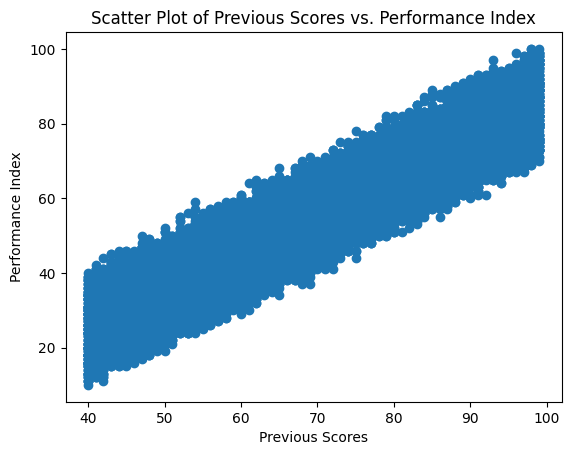

In [114]:

plt.scatter(df['Previous Scores'], df['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Scatter Plot of Previous Scores vs. Performance Index')
plt.show()

In [112]:
correlation = df['Previous Scores'].corr(df['Performance Index'])
print(f"Pearson Correlation between previous_scores and Performance Index: {correlation}")

Pearson Correlation between previous_scores and Performance Index: 0.9151891412264469


In [115]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.012390   
Previous Scores                       -0.012390         1.000000   
Extracurricular Activities             0.003873         0.008369   
Sleep Hours                            0.001245         0.005944   
Sample Question Papers Practiced       0.017463         0.007888   
Performance Index                      0.373730         0.915189   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.003873     0.001245   
Previous Scores                                     0.008369     0.005944   
Extracurricular Activities                          1.000000    -0.023284   
Sleep Hours                                        -0.023284     1.000000   
Sample Question Papers Practiced                    0.013103     0.003990   
Performance Index                                   0.024525 

As expected, Previous Scores to Performance Index has the strongest correlation, as reflected in the predicted weights